In [54]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [55]:
# read the data 
df = pd.read_csv("Retail_Data_Transactions.csv",parse_dates=["trans_date"])
df.head()

,customer_id,trans_date,tran_amount
0,CS5295,2013-02-11,35
1,CS4768,2015-03-15,39
2,CS2122,2013-02-26,52
3,CS1217,2011-11-16,99
4,CS1850,2013-11-20,78


In [56]:
# create a backup of the dataframe
df1 = df

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
customer_id    125000 non-null object
trans_date     125000 non-null datetime64[ns]
tran_amount    125000 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.9+ MB


In [4]:
#finding the minimum and maximum transaction date
print(df1.trans_date.min(),df1.trans_date.max())

2011-05-16 00:00:00 2015-03-16 00:00:00


In [58]:
df1.head()

,customer_id,trans_date,tran_amount
0,CS5295,2013-02-11,35
1,CS4768,2015-03-15,39
2,CS2122,2013-02-26,52
3,CS1217,2011-11-16,99
4,CS1850,2013-11-20,78


In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
customer_id    125000 non-null object
trans_date     125000 non-null datetime64[ns]
tran_amount    125000 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.9+ MB


In [60]:
df1.columns

Index(['customer_id', 'trans_date', 'tran_amount'], dtype='object')

In [61]:
# since the latest date available is 2015-03-16 we will set the present date as 2015-03-17
import datetime as dt 

In [62]:
now = pd.datetime(2015,4,1)
now

datetime.datetime(2015, 4, 1, 0, 0)

In [63]:
import numpy as np

In [64]:
rmf = df1.groupby('customer_id').agg({'trans_date': lambda x : (now - x.max())/np.timedelta64(1,'D'),
                                     'customer_id': lambda x : len(x),
                                     'tran_amount': lambda x : x.sum()})

In [65]:
rmf.head()

,trans_date,customer_id,tran_amount
customer_id,,,
CS1112,77.0,15,1012
CS1113,51.0,20,1490
CS1114,48.0,19,1432
CS1115,27.0,22,1659
CS1116,219.0,13,857


In [66]:
rmf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6889 entries, CS1112 to CS9000
Data columns (total 3 columns):
trans_date     6889 non-null float64
customer_id    6889 non-null int64
tran_amount    6889 non-null int64
dtypes: float64(1), int64(2)
memory usage: 215.3+ KB


In [67]:
rmf.rename(columns={'trans_date':'regency',
                   'customer_id': 'frequency',
                   'tran_amount':'monetary_value'}, inplace=True)

In [68]:
rmf.head()

,regency,frequency,monetary_value
customer_id,,,
CS1112,77.0,15,1012
CS1113,51.0,20,1490
CS1114,48.0,19,1432
CS1115,27.0,22,1659
CS1116,219.0,13,857


In [20]:
#chech in the original dataframe the frequency and count
print("Count is :{} , total  amount is {}" .format(df[df["customer_id"]=='CS1113'].count()[1],df[df["customer_id"]=='CS1113'].sum()[1]))

Count is :20 , total  amount is 1490


In [73]:
quartiles = rmf.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

      regency  frequency  monetary_value
0.25     38.0       14.0           781.0
0.50     69.0       18.0          1227.0
0.75    127.0       22.0          1520.0 <class 'pandas.core.frame.DataFrame'>


In [74]:
quartiles

,regency,frequency,monetary_value
0.25,38.0,14.0,781.0
0.50,69.0,18.0,1227.0
0.75,127.0,22.0,1520.0


In [75]:
quartiles = quartiles.to_dict()

In [76]:
quartiles

{'regency': {0.25: 38.0, 0.5: 69.0, 0.75: 127.0},
 'frequency': {0.25: 14.0, 0.5: 18.0, 0.75: 22.0},
 'monetary_value': {0.25: 781.0, 0.5: 1227.0, 0.75: 1520.0}}

In [77]:
# creating fuction of RFM
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1 

In [79]:
rfmSeg = rmf 

In [80]:
rfmSeg.columns

Index(['regency', 'frequency', 'monetary_value'], dtype='object')

In [81]:
rfmSeg['R_Quartile'] = rfmSeg['regency'].apply(RClass, args=('regency',quartiles,))
rfmSeg['F_Quartile'] = rfmSeg['frequency'].apply(FMClass, args=('frequency',quartiles,))
rfmSeg['M_Quartile'] = rfmSeg['monetary_value'].apply(FMClass, args=('monetary_value',quartiles,))

In [82]:
rfmSeg.head()

,regency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile
customer_id,,,,,,
CS1112,77.0,15,1012,3,3,3
CS1113,51.0,20,1490,2,2,2
CS1114,48.0,19,1432,2,2,2
CS1115,27.0,22,1659,1,2,1
CS1116,219.0,13,857,4,4,3


In [83]:
rfmSeg['Total Score'] = rfmSeg['R_Quartile'] + rfmSeg['F_Quartile'] +rfmSeg['M_Quartile']
print(rfmSeg.head(), rfmSeg.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6889 entries, CS1112 to CS9000
Data columns (total 7 columns):
regency           6889 non-null float64
frequency         6889 non-null int64
monetary_value    6889 non-null int64
R_Quartile        6889 non-null int64
F_Quartile        6889 non-null int64
M_Quartile        6889 non-null int64
Total Score       6889 non-null int64
dtypes: float64(1), int64(6)
memory usage: 430.6+ KB
             regency  frequency  monetary_value  R_Quartile  F_Quartile  \
customer_id                                                               
CS1112          77.0         15            1012           3           3   
CS1113          51.0         20            1490           2           2   
CS1114          48.0         19            1432           2           2   
CS1115          27.0         22            1659           1           2   
CS1116         219.0         13             857           4           4   

             M_Quartile  Total Score  
custom

In [84]:
rfmSeg.head()

,regency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,Total Score
customer_id,,,,,,,
CS1112,77.0,15,1012,3,3,3,9
CS1113,51.0,20,1490,2,2,2,6
CS1114,48.0,19,1432,2,2,2,6
CS1115,27.0,22,1659,1,2,1,4
CS1116,219.0,13,857,4,4,3,11


In [85]:
rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) \
                            + rfmSeg.F_Quartile.map(str) \
                            + rfmSeg.M_Quartile.map(str)

In [96]:
#rfmSeg['RFMClass'] = rfmSeg[["R_Quartile"]].apply(lambda x: ''.join(str(x)), axis = 1) \
 #                           + rfmSeg[["F_Quartile"]].apply(lambda x: ''.join(str(x)), axis = 1) \
  #                          + rfmSeg[["M_Quartile"]].apply(lambda x: ''.join(str(x)), axis = 1)

In [86]:
rfmSeg.head()

,regency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,Total Score,RFMClass
customer_id,,,,,,,,
CS1112,77.0,15,1012,3,3,3,9,333
CS1113,51.0,20,1490,2,2,2,6,222
CS1114,48.0,19,1432,2,2,2,6,222
CS1115,27.0,22,1659,1,2,1,4,121
CS1116,219.0,13,857,4,4,3,11,443


In [87]:
rfmSeg.sort_values(by=['RFMClass', 'monetary_value'], ascending=[True, False])

,regency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,Total Score,RFMClass
customer_id,,,,,,,,
CS4660,26.0,33,2527,1,1,1,3,111
CS4608,16.0,32,2449,1,1,1,3,111
CS5555,25.0,31,2439,1,1,1,3,111
CS4540,16.0,32,2361,1,1,1,3,111
CS4998,25.0,34,2358,1,1,1,3,111
...,...,...,...,...,...,...,...,...
CS7224,131.0,4,191,4,4,4,12,444
CS7891,490.0,6,188,4,4,4,12,444
CS8841,234.0,5,181,4,4,4,12,444


In [88]:
rfmSeg.reset_index(inplace=True)
rfmSeg.head()

,customer_id,regency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,Total Score,RFMClass
0,CS1112,77.0,15,1012,3,3,3,9,333
1,CS1113,51.0,20,1490,2,2,2,6,222
2,CS1114,48.0,19,1432,2,2,2,6,222
3,CS1115,27.0,22,1659,1,2,1,4,121
4,CS1116,219.0,13,857,4,4,3,11,443


In [89]:
rfmSeg.sort_values(by=['RFMClass', 'monetary_value'], ascending=[True, False]).head()

,customer_id,regency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,Total Score,RFMClass
3548,CS4660,26.0,33,2527,1,1,1,3,111
3496,CS4608,16.0,32,2449,1,1,1,3,111
4443,CS5555,25.0,31,2439,1,1,1,3,111
3428,CS4540,16.0,32,2361,1,1,1,3,111
3886,CS4998,25.0,34,2358,1,1,1,3,111


In [90]:
rfmSeg.groupby('RFMClass').agg('monetary_value').mean().to_frame().head()

,monetary_value
RFMClass,
111,1817.589041
112,1467.318182
113,1142.750000
121,1597.562500
122,1401.095930


In [91]:
rfmSeg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6889 entries, 0 to 6888
Data columns (total 9 columns):
customer_id       6889 non-null object
regency           6889 non-null float64
frequency         6889 non-null int64
monetary_value    6889 non-null int64
R_Quartile        6889 non-null int64
F_Quartile        6889 non-null int64
M_Quartile        6889 non-null int64
Total Score       6889 non-null int64
RFMClass          6889 non-null object
dtypes: float64(1), int64(6), object(2)
memory usage: 484.5+ KB


In [92]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean().to_frame()

,monetary_value
Total Score,
3,1817.589041
4,1735.154851
5,1595.800248
6,1466.662252
7,1264.107820
8,1136.062280
9,892.495146
10,818.934871
11,649.496350


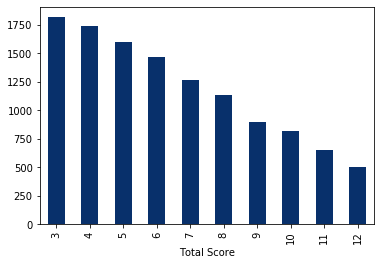

In [93]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean().plot(kind='bar', colormap='Blues_r')

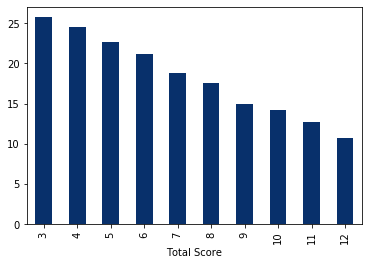

In [94]:
rfmSeg.groupby('Total Score').agg('frequency').mean().plot(kind='bar', colormap='Blues_r')

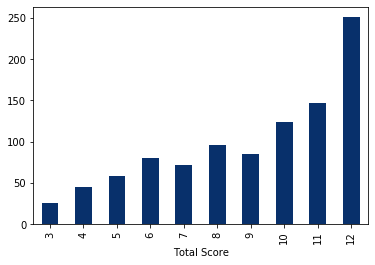

In [95]:
rfmSeg.groupby('Total Score').agg('regency').mean().plot(kind='bar', colormap='Blues_r')

In [99]:
rfmSeg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6889 entries, 0 to 6888
Data columns (total 9 columns):
customer_id       6889 non-null object
regency           6889 non-null float64
frequency         6889 non-null int64
monetary_value    6889 non-null int64
R_Quartile        6889 non-null int64
F_Quartile        6889 non-null int64
M_Quartile        6889 non-null int64
Total Score       6889 non-null int64
RFMClass          6889 non-null object
dtypes: float64(1), int64(6), object(2)
memory usage: 484.5+ KB


In [96]:
response = pd.read_csv("Retail_Data_Response.csv")

In [97]:
response.sort_values('customer_id' , inplace=True)

In [100]:
response.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6884 entries, 0 to 6883
Data columns (total 2 columns):
customer_id    6884 non-null object
response       6884 non-null int64
dtypes: int64(1), object(1)
memory usage: 161.3+ KB


In [101]:
rfmSeg.sort_values('customer_id', inplace=True)

In [102]:
mergred_data = pd.merge(rfmSeg,response,on='customer_id')

In [103]:
mergred_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6884 entries, 0 to 6883
Data columns (total 10 columns):
customer_id       6884 non-null object
regency           6884 non-null float64
frequency         6884 non-null int64
monetary_value    6884 non-null int64
R_Quartile        6884 non-null int64
F_Quartile        6884 non-null int64
M_Quartile        6884 non-null int64
Total Score       6884 non-null int64
RFMClass          6884 non-null object
response          6884 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 591.6+ KB


Text(0, 0.5, 'Proportion of Responders')

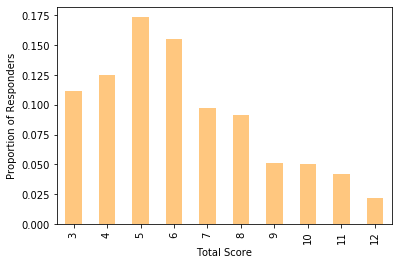

In [104]:
ax=mergred_data.groupby('Total Score').agg('response').mean().plot(kind='bar', colormap='copper_r')
ax.set_xlabel("Total Score")
ax.set_ylabel("Proportion of Responders")

In [105]:
a = mergred_data.groupby('Total Score').agg('response').mean()

In [106]:
a.to_frame()

,response
Total Score,
3,0.111872
4,0.125000
5,0.173697
6,0.154967
7,0.097156
8,0.091657
9,0.050971
10,0.050204
11,0.041971
